In [7]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from CCio import load_folder

from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

In [2]:
%matplotlib inline

auto_plot_style()

In [3]:
def integrate(df, min=460, max=850, column="dquanta"):
    dfrange = df.loc[(df.em_wl >= min) & (df.em_wl < max)]
    column  = getattr(dfrange, column)
    return column.sum()    

In [4]:
np.loadtxt("/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_40_crystal_0_fullscan_True_exwl_650_monograting_2_exposure_10_signal.asc", skiprows=28)

array([[  648.37384, 59887.     ],
       [  648.81238, 40766.     ],
       [  649.25092, 41532.     ],
       ...,
       [ 1532.6304 ,   370.     ],
       [ 1533.0522 ,   364.     ],
       [ 1533.474  ,   333.     ]])

In [5]:
folder_0 = "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/"

data_0  = load_folder(folder_0)

datas = data_0,

/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_0_crystal_0_fullscan_True_exwl_250_monograting_1_exposure_10_power_crystal.asc"
  times, powers = np.loadtxt(filename, delimiter=",").T
/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_1_crystal_0_fullscan_True_exwl_260_monograting_1_exposure_10_power_crystal.asc"
  times, powers = np.loadtxt(filename, delimiter=",").T
/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_2_crystal_0_fullscan_True_exwl_270_monograting_1_exposure_10_power_crystal.asc"
  times, powers = np.loadtxt(filename, delimiter=",").T
/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_3_crysta

/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_30_crystal_0_fullscan_True_exwl_550_monograting_2_exposure_10_power_crystal.asc"
  times, powers = np.loadtxt(filename, delimiter=",").T
/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_31_crystal_0_fullscan_True_exwl_560_monograting_2_exposure_10_power_crystal.asc"
  times, powers = np.loadtxt(filename, delimiter=",").T
/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_32_crystal_0_fullscan_True_exwl_570_monograting_2_exposure_10_power_crystal.asc"
  times, powers = np.loadtxt(filename, delimiter=",").T
/home/gonzalo/sw/git/CC/CCio.py:127: UserWarning: loadtxt: Empty input file: "/home/gonzalo/data/CC/quartz_black_2021_03_22_16_35_38_848000/state_33_cr

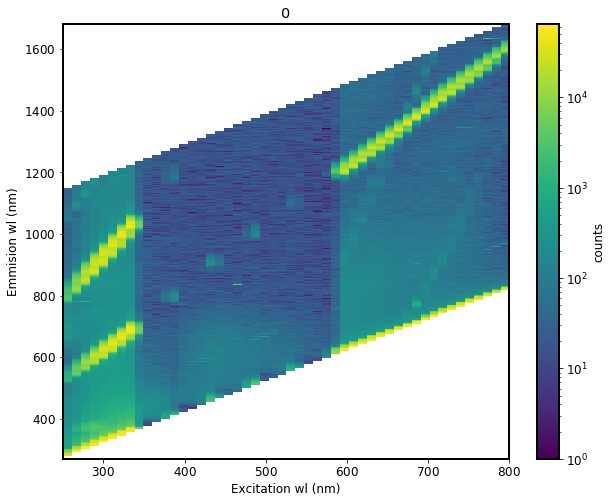

In [18]:
for i, data in enumerate(datas):
    plt.figure()
    plot2d(data.ex_wl, data.em_wl, np.abs(data.counts - 300) + 1, title=str(i), log=True)

#    plt.savefig(f"data_{i}_2d.png")

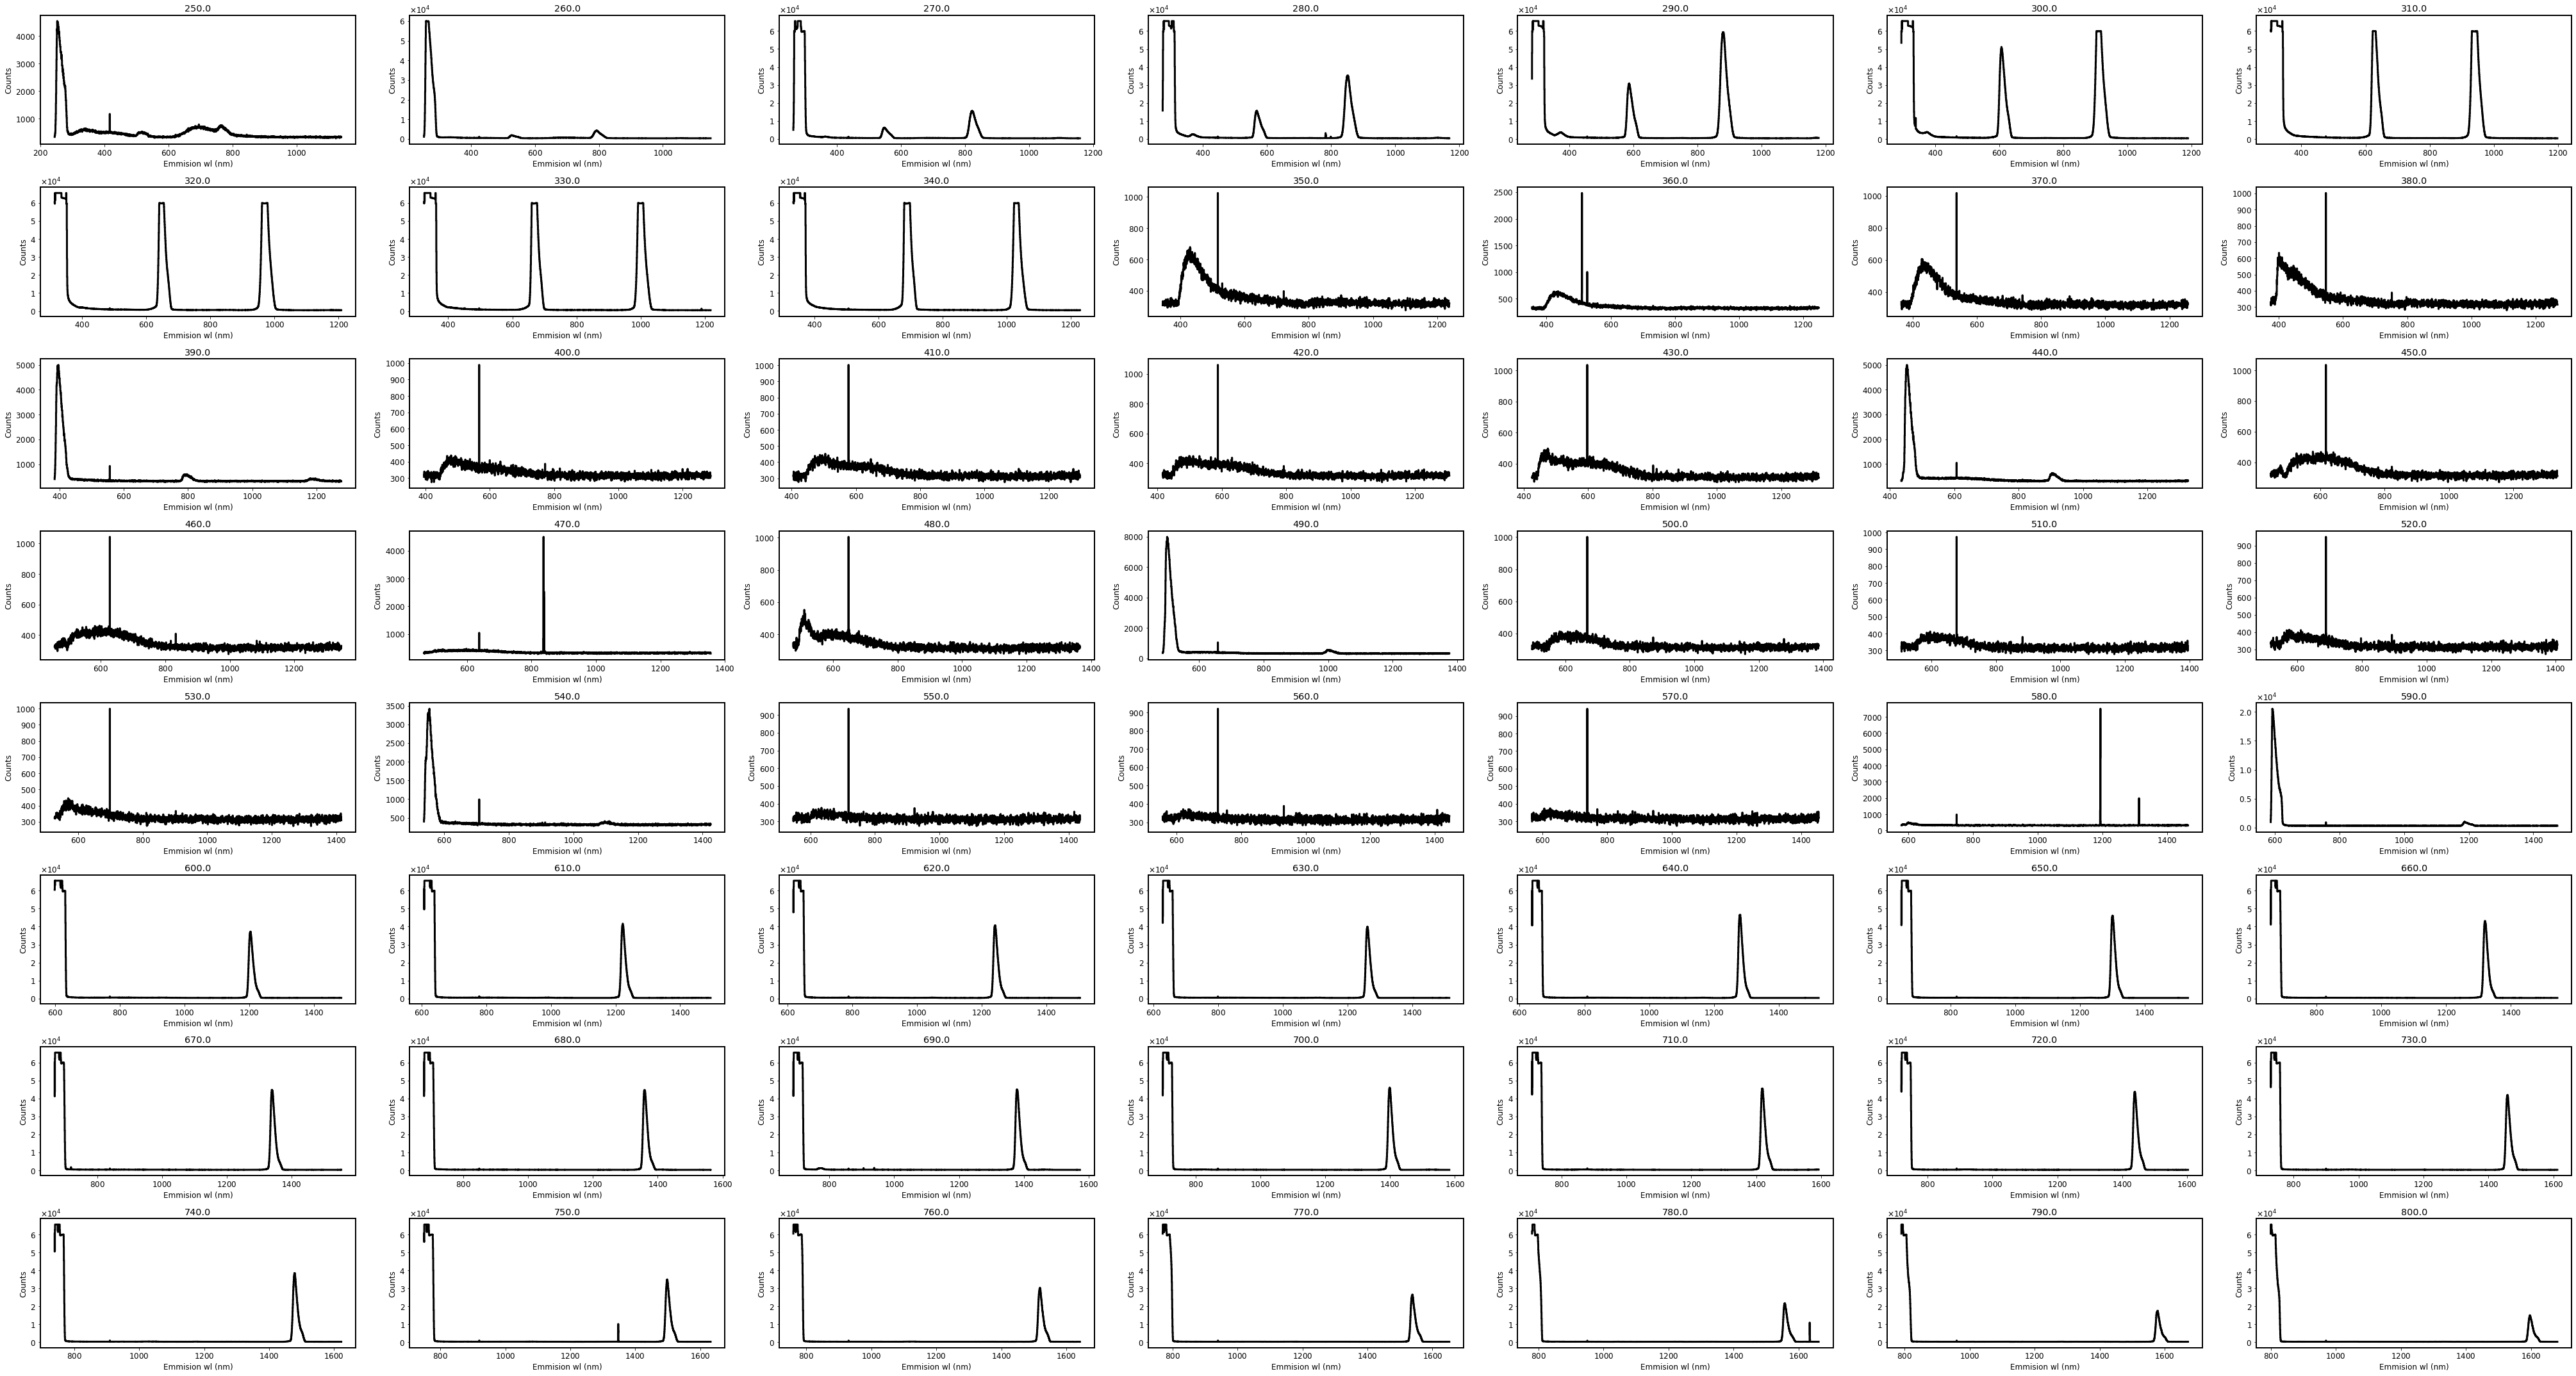

In [19]:
for i, data in enumerate(datas):
    plt.figure(figsize=(8*7, 5*6))
    for exwl, ex in data.groupby("ex_wl"):
        plt.subplot(8, 7, (exwl - 240) // 10)
        plot1d(ex.em_wl, ex.counts, title=str(exwl))

    plt.tight_layout()
#    plt.savefig(f"data_{i}_split.png")

In [20]:
import pandas as pd
sm = pd.read_csv(folder_0 + "state_map.txt")

In [22]:
sm[sm.mono_wavelength == 460]

state flipper_position flipperB_position  lpfw_position  mono_grating  \
34     34               up                up              3             2   

    mono_wavelength  power_meter_a_count power_meter_a_recording  \
34              460                  100                   False   

                              power_meter_a_save_path  \
34  D:\\Dropbox (Weizmann Institute)\\Color Center...   

    power_meter_a_wavelength  ...  power_meter_b_wavelength source_power  \
34                       460  ...                       460          100   

   source_shutter_control  spectro_exposure  spectro_grating  \
34                 camera                10                2   

                                    spectro_save_path  spectro_shutter  \
34  D:\\Dropbox (Weizmann Institute)\\Color Center...             auto   

    spectro_slit_width spectro_wavelength spfw_position  
34                1000                905             2  

[1 rows x 23 columns]

In [6]:
for i, data in enumerate(datas):
    print(i, data.exposure.drop_duplicates().values)

0 [10.]
1 [10.]
2 [10.]
3 [10.]
4 [10.]
5 [10.]
6 [10.]
7 [10.]
8 [10.]


In [ ]:
plt.figure(figsize=(8*7, 5*6))

g5 = data_5.groupby("ex_wl")
g7 = data_7.groupby("ex_wl")

for exwl in sorted(data_5.ex_wl.drop_duplicates()):
    plt.subplot(8, 7, (exwl - 240) // 10)
    
    d5 = g5.get_group(exwl)
    d7 = g7.get_group(exwl)
    
    plot1d(d5.em_wl, d5.dquanta, color="m", title=str(exwl))
    plot1d(d7.em_wl, d7.dquanta, color="k")

plt.tight_layout()
plt.savefig(f"quartz_paint.png")

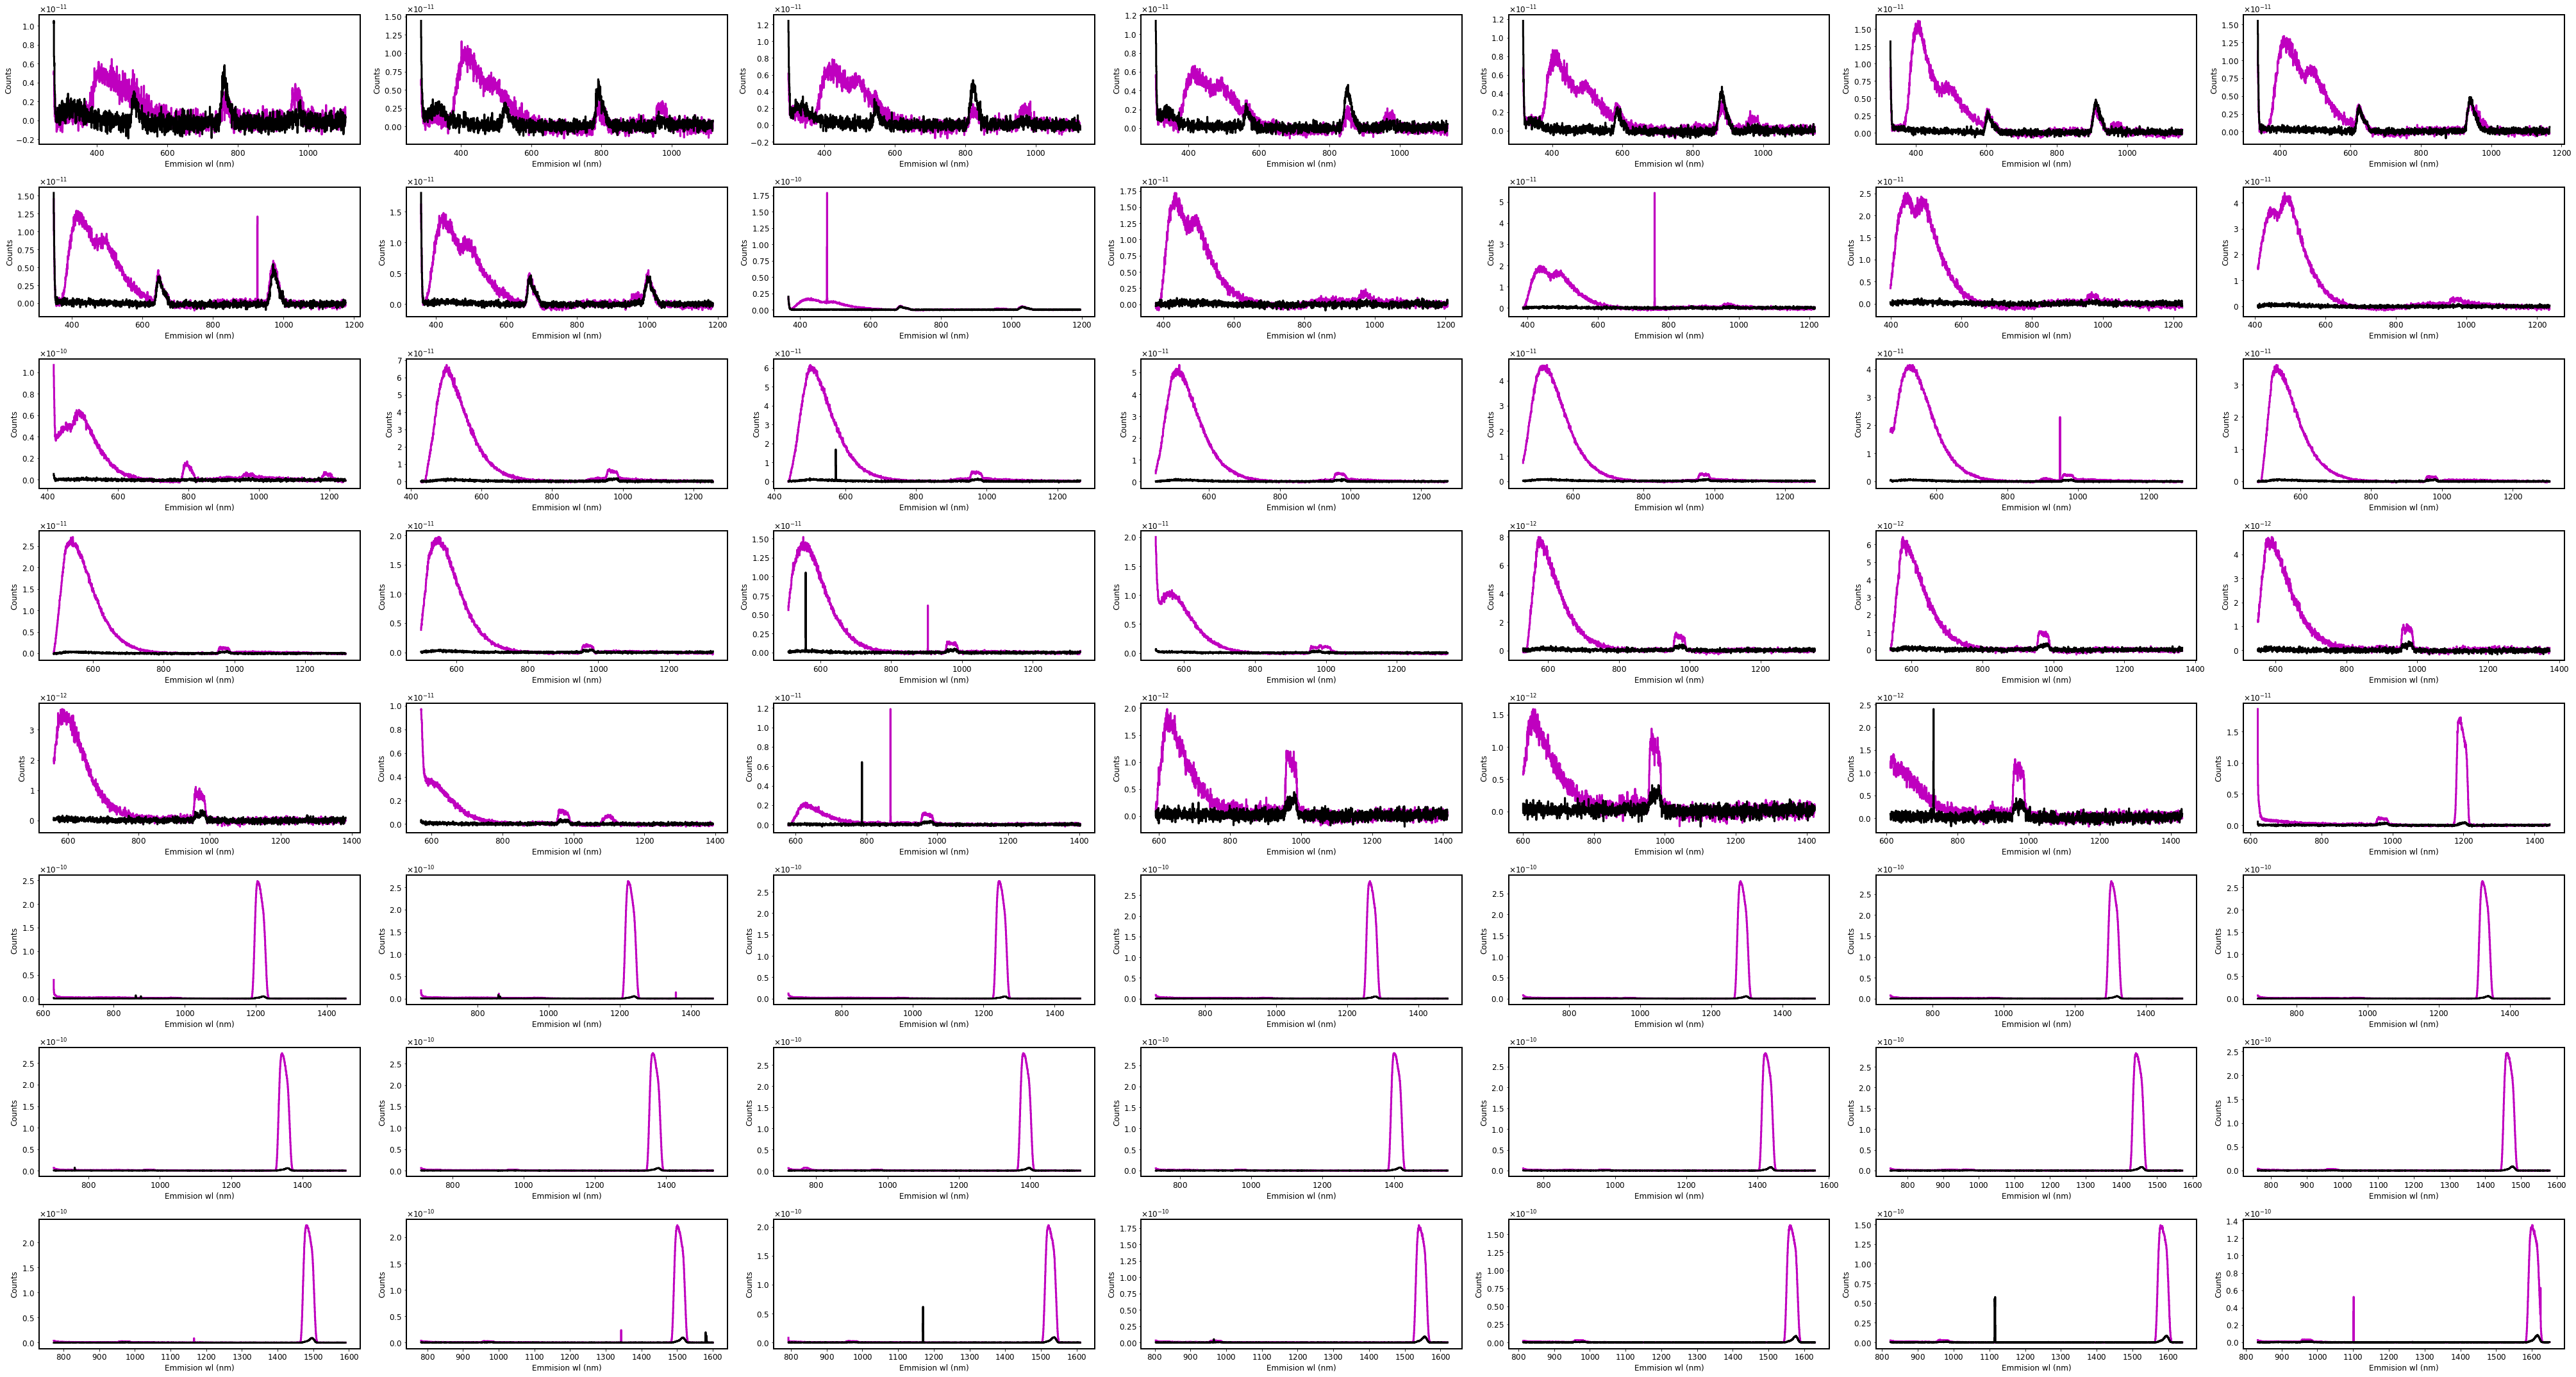

In [8]:
plt.figure(figsize=(8*7, 5*6))

g5 = data_5.groupby("ex_wl")
g7 = data_7.groupby("ex_wl")

for exwl in sorted(data_5.ex_wl.drop_duplicates()):
    plt.subplot(8, 7, (exwl - 240) // 10)
    
    d5 = g5.get_group(exwl)
    d7 = g7.get_group(exwl)
    
    plot1d(d5.em_wl, d5.dquanta, color="m", title=str(exwl))
    plot1d(d7.em_wl, d7.dquanta, color="k")

plt.tight_layout()
plt.savefig(f"quartz_paint.png")

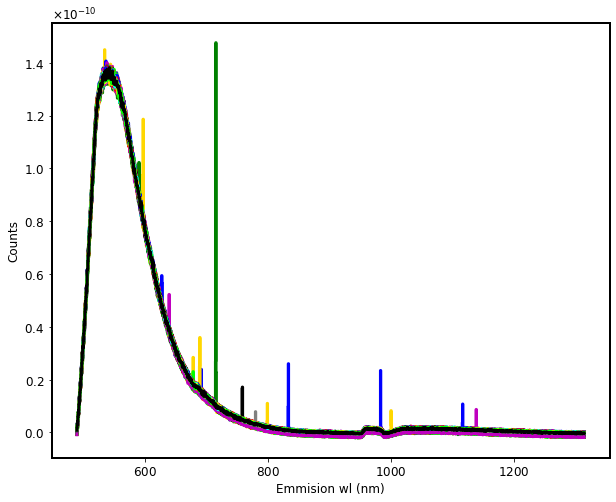

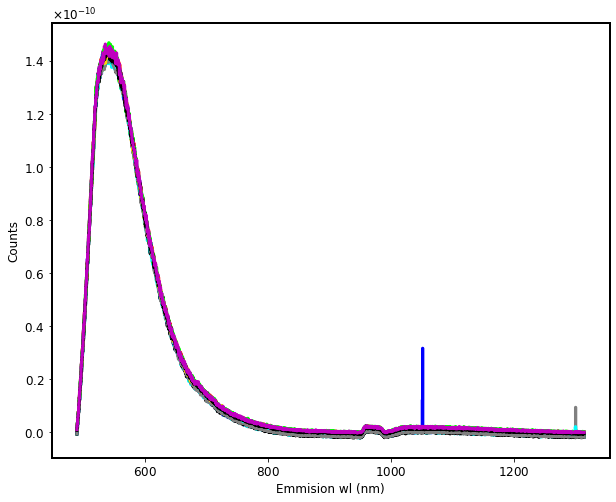

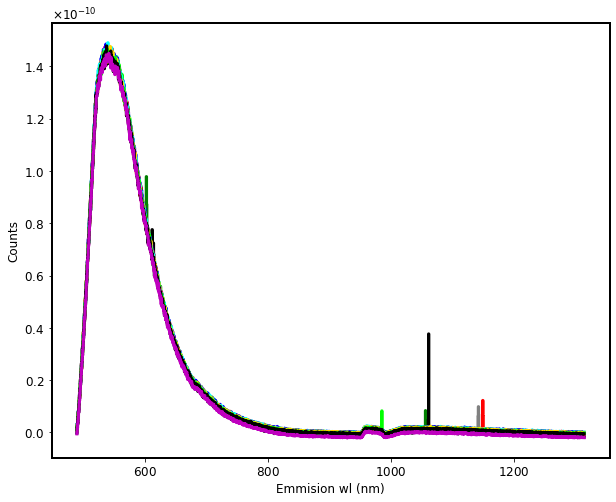

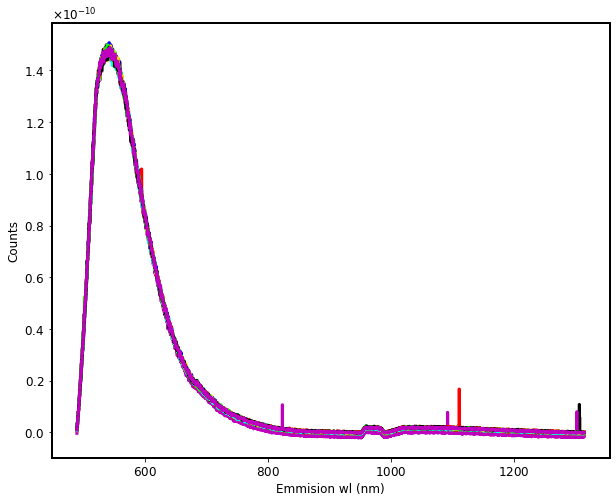

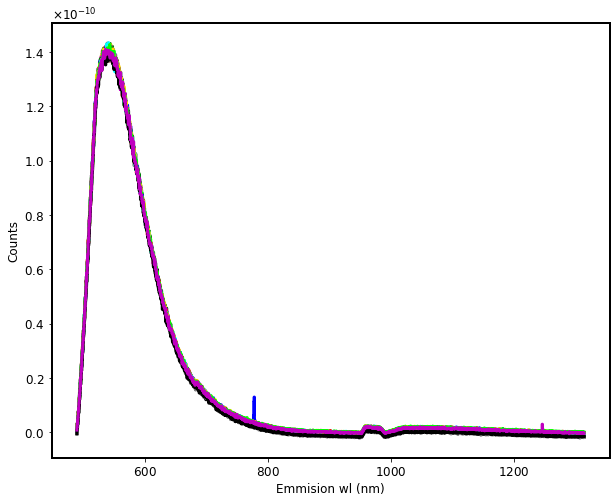

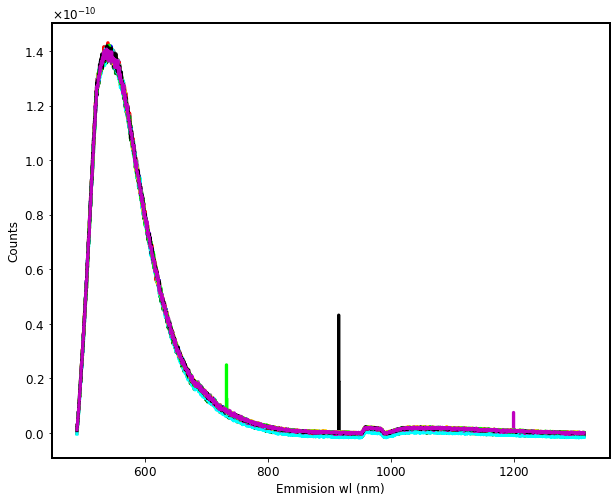

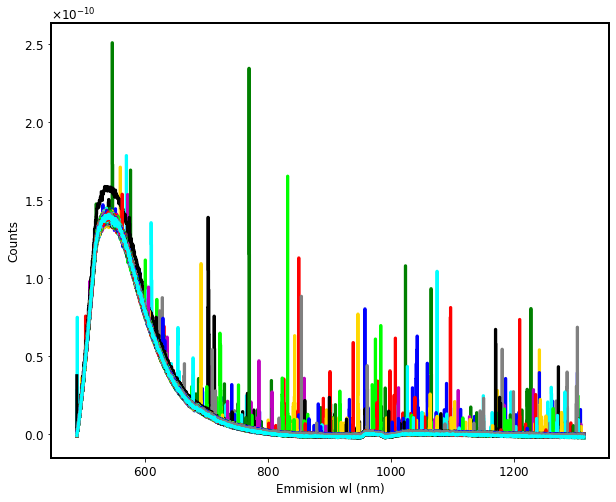

In [4]:
for data in datas:
    plt.figure()
    for _, d in data.groupby("state"):
        plot1d(d.em_wl, d.dquanta)

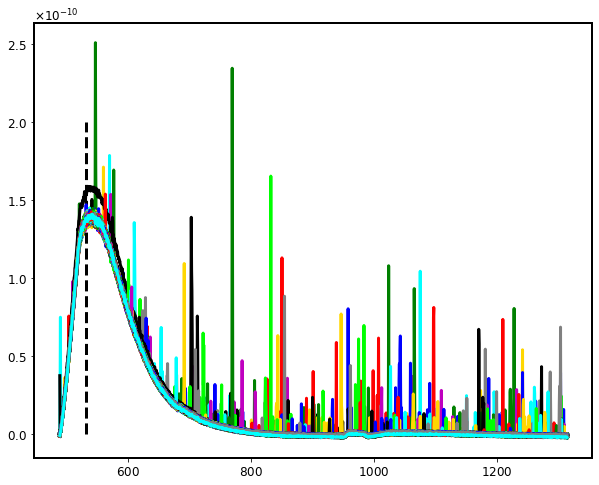

In [57]:
for _, state in data_6.groupby("state"):
    plt.plot(state.em_wl, state.dquanta);

plt.vlines(533, 0, 2e-10, linestyles="--")

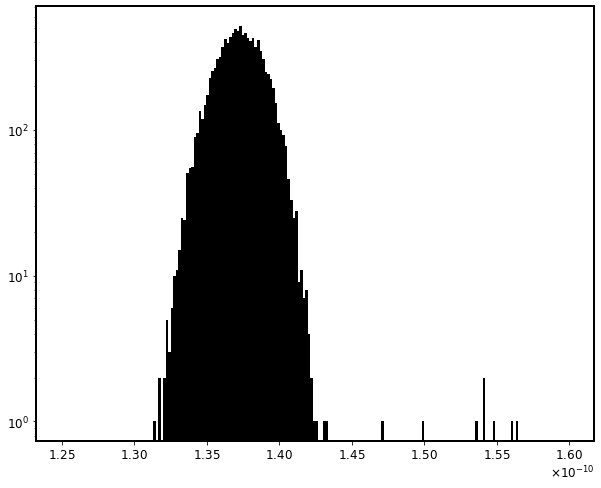

In [58]:
peak = data_6.loc[lambda x: (x.em_wl > 531) & (x.em_wl < 535)]
plt.hist(peak.dquanta, np.linspace(1.25e-10, 1.6e-10, 201))
plt.yscale("log")

In [41]:
integrals = data_6.groupby("state").apply(integrate, column="counts")

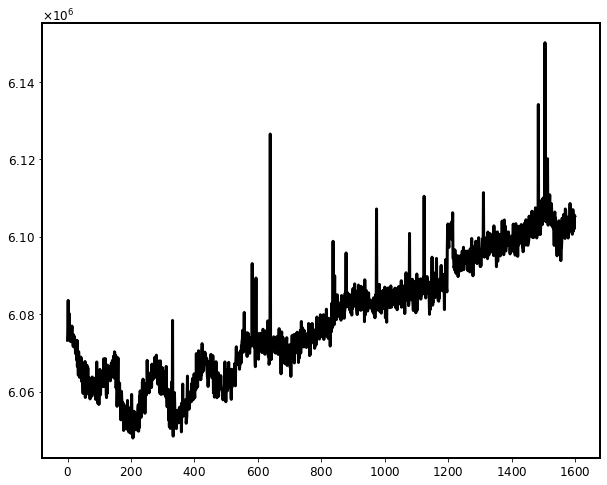

In [42]:
plt.plot(integrals)

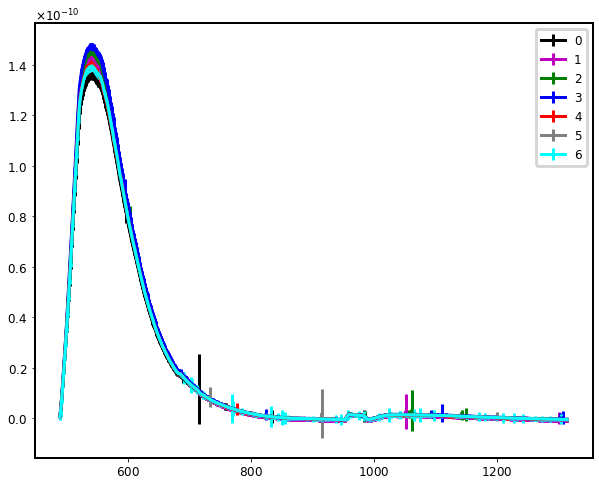

In [5]:
for i, data in enumerate(datas):
    df = data.groupby("em_wl", as_index=False).dquanta.agg(dict(mu="mean", sig="std"))
    plt.errorbar(df.em_wl, df.mu, df.sig, label=str(i))

plt.legend()

In [7]:
15*60/11*20

1636.3636363636363